<a href="https://colab.research.google.com/github/alivarastepour/Random-Network-Distillation/blob/master/rnd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stable-baselines3 gymnasium[atari]
!pip install "gymnasium[accept-rom-license, atari]"

In [2]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.11).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


In [3]:
!apt-get install python-opengl ffmpeg
!apt-get update
!apt-get install cmake
!pip install ez_setup
!pip install pyvirtualdisplay

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' 

In [4]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
import torch.nn as nn
from pyvirtualdisplay import Display
from random import randint
import imageio
from IPython.display import Image

In [5]:
def start_display():
  display = Display(visible=0, size=(1400, 900))
  display.start()
start_display()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
class CustomNetwork(nn.Module):
    def __init__(self, input_shape, output_dim):
        super(CustomNetwork, self).__init__()

    def forward(self, x):
        pass

class CustomRewardCallback(BaseCallback):
    def __init__(self, rnd_predictor, rnd_target, verbose=0):
        super(CustomRewardCallback, self).__init__(verbose)
        self.rnd_predictor = rnd_predictor
        self.rnd_target = rnd_target

    def _on_step(self):
        observation = self.locals["obs_tensor"]
        rew = self.locals["rewards"]
        return True

env = gym.make("ALE/FlagCapture-v5", render_mode="rgb_array")
model = PPO("CnnPolicy", env, verbose=1)
callback = CustomRewardCallback(None, None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [7]:
model.learn(total_timesteps=3, callback=callback)
model.save("CnnPolicy")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.16e+03 |
|    ep_rew_mean     | 0        |
| time/              |          |
|    fps             | 106      |
|    iterations      | 1        |
|    time_elapsed    | 19       |
|    total_timesteps | 2048     |
---------------------------------


In [8]:
model = PPO.load("CnnPolicy",env=env)

vec_env = model.get_env()
obs = vec_env.reset()
frames = []

for i in range(1000):
    action, _states = model.predict(obs)
    _ = vec_env.step(action)
    frame = vec_env.render()
    frames.append(frame)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


/usr/local/lib/python3.10/dist-packages/imageio/plugins/pillow.py:409: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


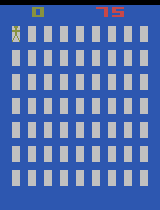

In [9]:
imageio.mimsave('/tmp/cartpole.gif', frames, fps=30)
Image(filename='/tmp/cartpole.gif')

In [10]:
env.close()